In [1]:
import scipy.io as scio
import numpy as np 
from skimage import io 
import cv2 
import matplotlib.pyplot as plt 
from skimage import color 

img_folder_path = '/data_disk1/Synth/SynthText'

file_path = '/data_disk1/Synth/SynthText/charBB.npy'

charBB =  np.load(file_path, allow_pickle=True)

img_name_path = '/data_disk1/Synth/SynthText/imnames.npy'

imnames = np.load(img_name_path, allow_pickle=True)

imnames = imnames[0]
charBB = charBB[0]

In [2]:
charBB[0].astype(np.uint32).shape

(2, 4, 54)

In [3]:
#Transpose  xy , 4point , bbox  -> bbox , 4point, xy 
charBB = charBB[0].transpose((2,1,0))

In [4]:
charBB.shape

(54, 4, 2)

In [5]:
first  = cv2.imread(img_folder_path + '/' + imnames[0][0])

In [7]:
green_line = (0,255,0)

first = cv2.polylines(first , [charBB[0].astype(np.int32)] , isClosed = True , color= green_line , thickness = 1 )


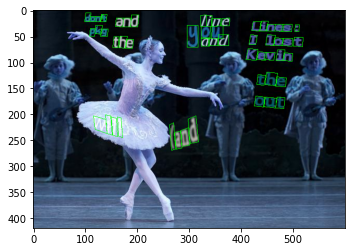

In [11]:
img_ = cv2.imread(img_folder_path + '/' + imnames[0][0])
for bbox in charBB:
    img_  = cv2.polylines(img_ , [bbox.astype(np.int32)], isClosed = True , color = (0,255,0) , thickness=1)
plt.imshow(img_)

In [20]:
#hmmm.....
def generate_gt(img_size , heatmap  , bbox_cor): 

    #bbox_cor = num_image , 4point , (x,y)

    row = img_size[0]
    col = img_size[1]

    gt_image = np.zeros((row, col) , np.float32)

    original_cor = np.float32(  [ [0,0] , [0, heatmap.shape[0]] , [heatmap.shape[1],0] , [heatmap.shape[1],heatmap.shape[0]]  ] )

    for bbox in bbox_cor: 

        bbox = np.float32( [bbox[0] , bbox[1] , bbox[3] , bbox[2] ])

        mtrx = cv2.getPerspectiveTransform(original_cor , bbox)
        dst = cv2.warpPerspective( heatmap, mtrx , (col, row) )

        gt_image += dst 
    
    return gt_image 


In [22]:
charBB.shape

(54, 4, 2)

In [35]:
sample_gt = generate_gt(img_size=(img_.shape[0] , img_.shape[1]) , heatmap=heatmap , bbox_cor = charBB )

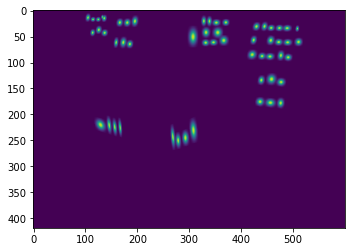

In [36]:
plt.imshow(sample_gt)

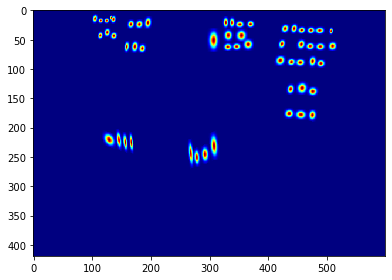

In [39]:
sample_gt = generate_gt(img_size=(img_.shape[0] , img_.shape[1]) ,heatmap=heatmap , bbox_cor = charBB )
sample_gt = sample_gt*255
sample_gt = sample_gt.astype(np.uint8)
sample_gt = cv2.applyColorMap(sample_gt, cv2.COLORMAP_JET)
sample_gt = cv2.cvtColor(sample_gt, cv2.COLOR_BGR2RGB)

img_ = cv2.cvtColor(img_ , cv2.COLOR_BGR2RGB)

io.imshow(sample_gt)

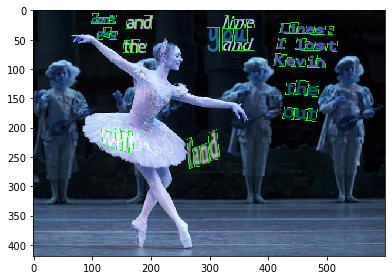

In [30]:
io.imshow(img_)

In [34]:
#Save result 
#io.imsave('/root/craft_re/sample_image/gt/bbox.jpg' , img_)
#io.imsave('/root/craft_re/sample_image/gt/region_score.jpg' , sample_gt)

In [50]:
new = cv2.addWeighted(img_ , 0.3 , sample_gt , 0.7 , 0)

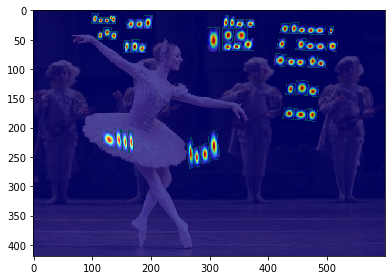

In [52]:
io.imshow(new)
io.imsave('/root/craft_re/sample_image/gt/bbox_2.jpg' , new)